In [1]:
# importing libraries
import pandas as pd
import numpy as np

In [2]:
# loading the dataset
df = pd.read_csv('nfa.csv',low_memory=False)
df.head()

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Armenia,1992,1,AreaPerCap,0.140292,0.199546,0.097188051,0.036888,0.029320,0.000000,5.032351e-01,3A
1,Armenia,1992,1,AreaTotHA,483000.000000,687000.000000,334600,127000.000000,100943.000800,0.000000,1.732543e+06,3A
2,Armenia,1992,1,BiocapPerCap,0.159804,0.135261,0.084003213,0.013742,0.033398,0.000000,4.262086e-01,3A
3,Armenia,1992,1,BiocapTotGHA,550176.242700,465677.972200,289207.1078,47311.551720,114982.279300,0.000000,1.467355e+06,3A
4,Armenia,1992,1,EFConsPerCap,0.387510,0.189462,1.26E-06,0.004165,0.033398,1.114093,1.728629e+00,3A


In [4]:
#dropping the unnamed column (ensure you confirm it is there, else dont run this cell)

#df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
#check the distribution of target variables
df['QScore'].value_counts()

3A    51481
2A    10576
2B    10096
1B       16
1A       16
Name: QScore, dtype: int64

In [6]:
#checking for null values in the dataset
df.isnull().sum()
#or
df.isna().sum()

country               0
year                  0
country_code          0
record                0
crop_land         20472
grazing_land      20472
forest_land       20472
fishing_ground    20473
built_up_land     20473
carbon            20473
total                 9
QScore                1
dtype: int64

In [7]:
#dropping the rows with missing values.
df.dropna(inplace = True)
df.isna().sum()

country           0
year              0
country_code      0
record            0
crop_land         0
grazing_land      0
forest_land       0
fishing_ground    0
built_up_land     0
carbon            0
total             0
QScore            0
dtype: int64

In [8]:
#reset the dataframe index, to correct the effect of the null values dropped from the dataset
df = df.reset_index(drop = True)

In [9]:
#For now, we will convert this to a binary classification problem by combining class '2A' and '1A'.
#A binary classification problem is a value range of 0 to 1, so as to enable us to use a logistic regression model.

df['QScore'] = df['QScore'].replace(['1A'], '2A')
df.QScore.value_counts()

3A    51473
2A      240
Name: QScore, dtype: int64

In [10]:
#separating the target variable and 
#undersampling the 3A class
df_2A = df[df.QScore=='2A']
df_3A = df[df.QScore=='3A'].sample(350, random_state=1)
data_df = df_2A.append(df_3A).reset_index(drop=True)
data_df

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Algeria,2016,4,AreaPerCap,2.072989e-01,8.112722e-01,0.048357265,2.258528e-02,2.998367e-02,0.000000,1.119497e+00,2A
1,Algeria,2016,4,AreaTotHA,8.417600e+06,3.294260e+07,1963600,9.171000e+05,1.217520e+06,0.000000,4.545842e+07,2A
2,Algeria,2016,4,BiocapPerCap,2.021916e-01,2.636077e-01,0.027166736,7.947991e-03,2.924496e-02,0.000000,5.301590e-01,2A
3,Algeria,2016,4,BiocapTotGHA,8.210214e+06,1.070408e+07,1103135.245,3.227369e+05,1.187524e+06,0.000000,2.152769e+07,2A
4,Algeria,2016,4,EFConsPerCap,6.280528e-01,1.810332e-01,0.162800822,1.472910e-02,2.924496e-02,1.391455,2.407316e+00,2A
...,...,...,...,...,...,...,...,...,...,...,...,...
585,Sierra Leone,1994,197,AreaPerCap,1.424029e-01,5.135843e-01,0.709586732,6.315686e-01,3.220641e-02,0.000000,2.029349e+00,3A
586,Luxembourg,2007,256,BiocapPerCap,4.411709e-01,8.708716e-02,0.986200674,8.009810e-04,1.042298e-01,0.000000,1.619490e+00,3A
587,Botswana,1983,20,EFConsPerCap,3.082520e-01,7.756213e-01,0.264032732,2.549475e-02,1.373033e-02,0.703266,2.090397e+00,3A
588,Argentina,1968,9,BiocapTotGHA,2.383132e+07,7.567452e+07,34001536.15,7.155958e+07,8.568679e+05,0.000000,2.059238e+08,3A


In [11]:
#using the scikit-learn utils function to shuffle the target variable
import sklearn.utils
data_df = sklearn.utils.shuffle(data_df, random_state=1)
data_df = data_df.reset_index(drop=True)
data_df.shape
data_df.QScore.value_counts()

3A    350
2A    240
Name: QScore, dtype: int64

In [12]:
#Encoding the categorical features. 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_df.record = encoder.fit_transform(data_df.record)
data_df.QScore = encoder.fit_transform(data_df.QScore)

In [14]:
#let's preview the encoded feature
#data_df.record, data_df.QScore

In [15]:
#Preprocessing and uncorrelated columns dropping.
data_df = data_df.drop(columns=['country_code', 'country', 'year'])
X = data_df.drop(columns = 'QScore')
y = data_df['QScore']

In [16]:
#Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
y_train.value_counts()

1    248
0    165
Name: QScore, dtype: int64

In [17]:
#we use SMOTE only on the training data to handle this.
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
x_train_balanced, y_balanced = smote.fit_sample(x_train, y_train)
#value count our y_balanced to cross check the effect of smote on the dataset
y_balanced.value_counts()

1    248
0    248
Name: QScore, dtype: int64

In [18]:
#using minmaxscaler to scale every other feature aside the record column
#because the record column is not a numerical feature but a categorical one

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#scaling the x train set, without the record feature, becasue it does not need the scaling
normalised_train_df = scaler.fit_transform(x_train_balanced.drop(columns=['record']))

#passing the scaled data into a dataframe and setting the columns without the record feature.
#the drop statement helps to ensure that the columns were not wrongly placed.
normalised_train_df = pd.DataFrame(normalised_train_df, columns=x_train_balanced.drop(columns=['record']).columns)

#adding the record column back
normalised_train_df['record'] = x_train_balanced['record']

In [19]:
#resetting the indexes for easy computatiion
x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

normalised_test_df = scaler.transform(x_test.drop(columns=['record']))
normalised_test_df = pd.DataFrame(normalised_test_df, columns=x_test.drop(columns=['record']).columns)
normalised_test_df['record'] = x_test['record']

In [21]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=1)
log_reg.fit(normalised_train_df, y_balanced)
new_predictions = log_reg.predict(normalised_test_df)

Measuring classification performance

In [22]:
#cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, normalised_train_df, y_balanced, cv=5,
                        scoring='f1_macro')
scores*100

array([56.89655172, 44.44444444, 46.44278861, 41.2493493 , 53.49264706])

In [23]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(LogisticRegression(), normalised_train_df, y_balanced, \
                        cv=loo, scoring='f1_macro')
average_score = scores.mean() * 100
print("Average score %.2f" % average_score)

Average score 52.62


In [24]:
#confusion matrix
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
cnf_mat = confusion_matrix(y_true=y_test, y_pred=new_predictions)

#Preview the confusion matrix
good_cnf = pd.DataFrame(cnf_mat, columns=['Actual- Positive', 'Actual- Negative'], 
                        index=['Predicted- Positive', 'Predicted- Negative'])
good_cnf

,Actual- Positive,Actual- Negative
Predicted- Positive,39,36
Predicted- Negative,41,61


In [25]:
print("%.0f is the number of True Positive (TP)" % (cnf_mat[0, 0]))
print("%.0f is the number of False Positive (FP)" % (cnf_mat[0, 1]))
print("%.0f is the number of False Negative (FN)" % (cnf_mat[1, 0]))
print("%.0f is the number of True Negative (TN)" % (cnf_mat[1, 1]))

39 is the number of True Positive (TP)
36 is the number of False Positive (FP)
41 is the number of False Negative (FN)
61 is the number of True Negative (TN)


metrics

In [26]:
#Accuracy
accuracy = accuracy_score(y_true = y_test, y_pred = new_predictions)
print('Accuracy: {}'.format(round(accuracy*100, 2)))

Accuracy: 56.5


In [28]:
#precision
precision = precision_score(y_true=y_test, y_pred=new_predictions)
print('Presicion: {}'.format(round(precision*100), 2))

Presicion: 63.0


In [29]:
#recall
recall = recall_score(y_true=y_test, y_pred=new_predictions)
print('Recall: {}'.format(round(recall*100), 2))

Recall: 60.0


In [30]:
#F1 scores
f1 = f1_score(y_true=y_test, y_pred=new_predictions)
print('F1: {}'.format(round(f1*100), 2))

F1: 61.0


k-fold

In [31]:
#K-Fold
#calculating the classification report for kfold

from sklearn.model_selection import KFold

#setting the number of splits
kf = KFold(n_splits=5)
kf.split(normalised_train_df)
#metric lists to hold the values calculated for every k-fold carried out
f1_scores, accuracy_kfold, precision_kfold, recall_kfold = [], [], [], []
kmodel = []

#run for every split
for train_index, test_index in kf.split(normalised_train_df):
    kx_train, kx_test = normalised_train_df.iloc[train_index],\
                      normalised_train_df.iloc[test_index]
    ky_train, ky_test = y_balanced[train_index],\
                      y_balanced[test_index]
    model = LogisticRegression().fit(kx_train, ky_train)
    #save result to list
    f1_scores.append(f1_score(y_true = ky_test, y_pred = model.predict(kx_test)))
    accuracy_kfold.append(accuracy_score(y_true=ky_test, y_pred=model.predict(kx_test)))
    precision_kfold.append(precision_score(y_true = ky_test, y_pred = model.predict(kx_test), zero_division=True))
    recall_kfold.append(recall_score(y_true = ky_test, y_pred = model.predict(kx_test)))
    pred = model.predict(kx_test)
    kmodel.append(pred)

In [32]:
classification_scores = pd.DataFrame([accuracy_kfold, precision_kfold, recall_kfold, f1_scores], index=['Accuracy', 
                                                                                                          'Precision',
                                                                                                          'Recall',
                                                                                                         'F1 Scores'],
                                    columns=['k1', 'k2', 'k3', 'k4', 'k5'])
classification_scores

,k1,k2,k3,k4,k5
Accuracy,0.430000,0.404040,0.454545,0.424242,0.131313
Precision,1.000000,0.424242,1.000000,0.647059,0.131313
Recall,0.033898,0.259259,0.100000,0.177419,1.000000
F1 Scores,0.065574,0.321839,0.181818,0.278481,0.232143


In [33]:
from sklearn.metrics import classification_report
#classification report
if len(ky_test) != len(kmodel[0]):
    kmodels = kmodel[0][:-1]
    print(classification_report(ky_test, kmodels))
else:
    print(classification_report(ky_test, kmodel[0]))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93        86
           1       0.50      0.08      0.13        13

    accuracy                           0.87        99
   macro avg       0.69      0.53      0.53        99
weighted avg       0.83      0.87      0.82        99



In [34]:
#classification report
if len(ky_test) != len(kmodel[1]):
    kmodels = kmodel[1][1:]
    print(classification_report(ky_test, kmodels))
else:
    print(classification_report(ky_test, kmodel[1]))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76        86
           1       0.15      0.38      0.22        13

    accuracy                           0.64        99
   macro avg       0.52      0.53      0.49        99
weighted avg       0.78      0.64      0.69        99



In [35]:
#You can experiment for other splits by using the slice (2, 3, 4) inside the previous classification reports

stratifield k-fold

In [36]:
#StratifiedKFold
#Calculating the classification reports skfold 

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
f1_scores_skfold, accuracy_skfold, precision_skfold, recall_skfold, cnf_mtxS = [], [], [], [], []
skmodel=[]

#run for every split
for train_index, test_index in skf.split(normalised_train_df, y_balanced):
    skx_train, skx_test = np.array(normalised_train_df)[train_index],\
                      np.array(normalised_train_df)[test_index]
    sky_train, sky_test = y_balanced[train_index],\
                      y_balanced[test_index]
    model = LogisticRegression().fit(skx_train, sky_train)
    #save result to list
    f1_scores_skfold.append(f1_score(y_true = sky_test, y_pred = model.predict(skx_test)))
    accuracy_skfold.append(accuracy_score(y_true=sky_test, y_pred=model.predict(skx_test)))
    precision_skfold.append(precision_score(y_true = sky_test, y_pred = model.predict(skx_test), zero_division=True))
    recall_skfold.append(recall_score(y_true = sky_test, y_pred = model.predict(skx_test)))
    skmodel.append(model.predict(skx_test))

In [37]:
classification_scores2 = pd.DataFrame([accuracy_skfold, precision_skfold, recall_skfold, f1_scores_skfold], index=['Accuracy', 
                                                                                                          'Precision',
                                                                                                          'Recall',
                                                                                                         'F1 Scores'],
                                    columns=['sk1', 'sk2', 'sk3', 'sk4', 'sk5'])
classification_scores2

,sk1,sk2,sk3,sk4,sk5
Accuracy,0.450000,0.535354,0.545455,0.545455,0.545455
Precision,0.441860,0.540000,0.543860,0.541667,0.540000
Recall,0.380000,0.540000,0.620000,0.530612,0.551020
F1 Scores,0.408602,0.540000,0.579439,0.536082,0.545455


In [38]:
#classification report
if len(sky_test) != len(skmodel[0]):
    skmodels = skmodel[0][:-1]
    print(classification_report(sky_test, skmodels))
else:
    print(classification_report(sky_test, skmodel[0]))


              precision    recall  f1-score   support

           0       0.56      0.64      0.60        50
           1       0.57      0.49      0.53        49

    accuracy                           0.57        99
   macro avg       0.57      0.56      0.56        99
weighted avg       0.57      0.57      0.56        99



In [39]:
#classification report
if len(sky_test) != len(skmodel[1]):
    skmodels = skmodel[1][1:]
    print(classification_report(sky_test, skmodels))
else:
    print(classification_report(sky_test, skmodel[1]))


              precision    recall  f1-score   support

           0       0.55      0.54      0.55        50
           1       0.54      0.55      0.55        49

    accuracy                           0.55        99
   macro avg       0.55      0.55      0.55        99
weighted avg       0.55      0.55      0.55        99



In [40]:
#You can experiment for other splits by using the slice (2, 3, 4) inside the previous classification reports

decision tree classifier

In [41]:
# Tree-Based Methods and The Support Vector Machine
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=1)
dec_tree.fit(normalised_train_df, y_balanced)
dec_pred = dec_tree.predict(normalised_test_df)


In [42]:
print("Accuracy score {}".format(round(accuracy_score(y_test, dec_pred), 3)))
print("Precision score%.3f" % (precision_score(y_test, dec_pred)))
print("Recall score{}".format(round(recall_score(y_test, dec_pred), 3)))
print("F1 score %.3f" % (f1_score(y_test, dec_pred)))

Accuracy score 0.576
Precision score0.636
Recall score0.618
F1 score 0.627


In [43]:
print(classification_report(y_test, dec_pred))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51        75
           1       0.64      0.62      0.63       102

    accuracy                           0.58       177
   macro avg       0.57      0.57      0.57       177
weighted avg       0.58      0.58      0.58       177



working with xgboost and lightgb

In [44]:
#xgboost with random forest
from xgboost import XGBRFClassifier
extreme = XGBRFClassifier(random_state=1)
extreme.fit(normalised_train_df, y_balanced)
extreme_pred = extreme.predict(normalised_test_df)

In [45]:
#classification report
print(classification_report(y_test, extreme_pred))

              precision    recall  f1-score   support

           0       0.49      0.53      0.51        75
           1       0.63      0.59      0.61       102

    accuracy                           0.56       177
   macro avg       0.56      0.56      0.56       177
weighted avg       0.57      0.56      0.57       177



In [46]:
#xgboost using gradient boosting
from xgboost import XGBClassifier
extreme1 = XGBClassifier(random_state=1)
extreme1.fit(normalised_train_df, y_balanced)
extreme1_pred = extreme1.predict(normalised_test_df)

In [47]:
#classification report
print(classification_report(y_test, extreme1_pred))

              precision    recall  f1-score   support

           0       0.60      0.61      0.61        75
           1       0.71      0.70      0.70       102

    accuracy                           0.66       177
   macro avg       0.65      0.65      0.65       177
weighted avg       0.66      0.66      0.66       177



In [48]:
#lightgbm
from lightgbm import LGBMClassifier
light = LGBMClassifier(random_state=1)
light.fit(normalised_train_df, y_balanced)
light_pred = light.predict(normalised_test_df)

In [49]:
#classification report
print(classification_report(y_test, light_pred))

              precision    recall  f1-score   support

           0       0.58      0.56      0.57        75
           1       0.69      0.71      0.70       102

    accuracy                           0.64       177
   macro avg       0.63      0.63      0.63       177
weighted avg       0.64      0.64      0.64       177



extra tree classifier

In [50]:
#extra tree classifier
from sklearn.ensemble import ExtraTreesClassifier
tree = ExtraTreesClassifier(random_state=1)
tree.fit(normalised_train_df, y_balanced)
tree_pred = tree.predict(normalised_test_df)

In [51]:
n_estimators = [10, 50, 100, 250, 400]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [52]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(tree, hyperparameter_grid, random_state=1)
search = clf.fit(normalised_train_df, y_balanced)

In [53]:
#checking for the best parameter for the model
search.best_params_.values()

dict_values([100, 9, 2, 'auto'])

In [55]:
#experimenting with this parameter to test the model's performance
tree_param = ExtraTreesClassifier(n_estimators=100, min_samples_split=9, 
                                 min_samples_leaf=2, max_features='auto', random_state=1)
tree_param.fit(normalised_train_df, y_balanced)
tree_param_pred = tree_param.predict(normalised_test_df)

In [57]:
#classification report for this hyperparameter tuning
print(classification_report(y_test, tree_param_pred))

              precision    recall  f1-score   support

           0       0.45      0.51      0.48        75
           1       0.60      0.55      0.57       102

    accuracy                           0.53       177
   macro avg       0.53      0.53      0.53       177
weighted avg       0.54      0.53      0.53       177



roc

In [58]:
#calculate the roc curve for each model
#define a function to work on our roc curve
import matplotlib.pyplot as plt

def Curve_plot(test_value, predicted_value, *dataset):
    from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
    #The function takes both the true outcomes (0,1) from the test set and the predicted probabilities for the 1 class. 
    #The function returns the false positive rates for each threshold, true positive rates for each threshold and 
    #thresholds.
    
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(test_value))]
    if dataset:
        #import Logistic regression
        from sklearn.linear_model import LogisticRegression
        from sklearn.model_selection import train_test_split
        #Standard scaler
        from sklearn.preprocessing import MinMaxScaler
        
        #preprocessing and vector/matrix slicing
        X, y = data_df.drop(columns = 'QScore'), data_df.QScore
        
        #train test split
        X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)
        
        import imblearn
        from imblearn.over_sampling import SMOTE
        smote = SMOTE(random_state=1)
        x_train_balanced, y_balanced = smote.fit_sample(X_train, Y_train)
        
        #scaling
        scaler = MinMaxScaler()
        normalized_train = scaler.fit_transform(x_train_balanced)
        X_train = pd.DataFrame(normalized_train, columns = x_train.columns)
        normalized_test = scaler.transform(x_test)
        X_test = pd.DataFrame(normalized_test,columns=x_test.columns)
        
        # fit a model
        model = LogisticRegression(solver='lbfgs', random_state=1)
        model.fit(X_train, y_balanced)
        
        # predict probabilities
        lr_probs = model.predict_proba(X_test)
        
        # keep probabilities for the positive outcome only
        lr_probs = lr_probs[:, 1]
        
        # calculate scores
        ns_auc = roc_auc_score(test_value, ns_probs)
        lr_auc = roc_auc_score(test_value, lr_probs)
        
        # summarize scores
        print('No Skill: ROC AUC=%.3f' % (ns_auc))
        print('Logistic: ROC AUC=%.3f' % (lr_auc))
        
        # calculate roc curves
        ns_fpr, ns_tpr, _ = roc_curve(test_value, ns_probs)
        lr_fpr, lr_tpr, _ = roc_curve(test_value, lr_probs)
        lr_precision, lr_recall, _ = precision_recall_curve(test_value, lr_probs)
        
        #calculate the scores
        pr_lr_auc = auc(lr_recall, lr_precision)
        
        if True:
            # plot the roc curve for the model
            plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
            plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
            # axis labels
            plt.title('ROC Curve')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            # show the legend
            plt.legend()
            # show the plot
            plt.show()
        if True:
            # plot the precision_recall curve model:
            no_skill = len(test_value[test_value==1])/len(test_value)
            plt.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill')
            plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
            # axis labels
            plt.title('Precision_Recall Curve')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            # show the legend
            plt.legend()
            # show the plot
            plt.show()
        #summarise the scores
        print('Logistics: AUC=%.3f'%pr_lr_auc)
        
    else:
        # calculate roc curves
        ns_fpr, ns_tpr, _ = roc_curve(test_value, ns_probs)
        fpr, tpr, _ = roc_curve(test_value, predicted_value)
        lr_precision, lr_recall, _ = precision_recall_curve(test_value, predicted_value)
        #calculate the scores
        pr_lr_auc = auc(lr_recall, lr_precision)
        #summarise the scores
        print('Logistics: auc=%.3f'%pr_lr_auc)
        if True:
            # plot the roc curve for the model
            plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
            plt.plot(fpr, tpr, marker='.', label='Model')
            # axis labels
            plt.title('ROC Curve')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            # show the legend
            plt.legend()
            # show the plot
            plt.show()
        if True:
            # plot the precision_recall curve model:
            no_skill = len(test_value[test_value==1])/len(test_value)
            plt.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill')
            plt.plot(lr_recall, lr_precision, marker='.', label='Model')
            # axis labels
            plt.title('Precision_Recall Curve')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            # show the legend
            plt.legend()
            # show the plot
            plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.588


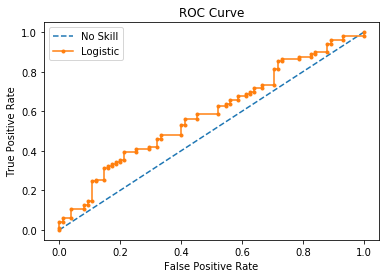

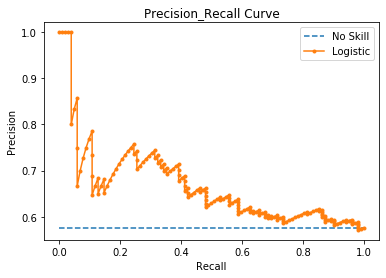

Logistics: AUC=0.666


In [59]:
#comparing with the predictions from a logistic model
Curve_plot(y_test, extreme1_pred, data_df)

Logistics: auc=0.729


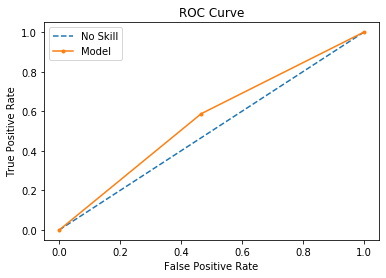

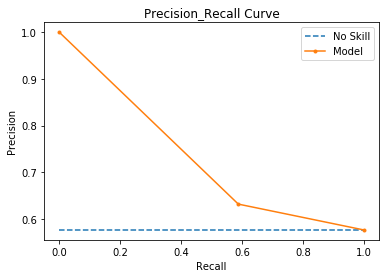

In [60]:
#plotting the ROC curve for random forest tree classifier
Curve_plot(y_test, extreme_pred)

Logistics: auc=0.729


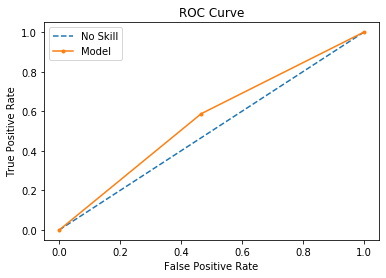

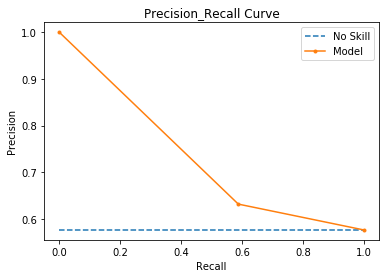

In [63]:
#plotting the ROC curve for xgboost
Curve_plot(y_test, extreme_pred)

Logistics: auc=0.737


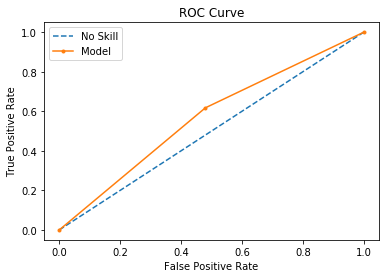

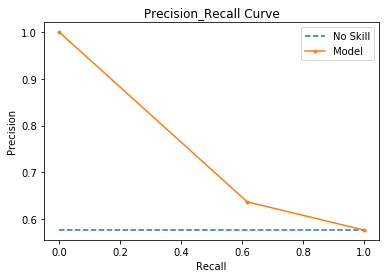

In [64]:
#plotting the ROC curve for decision tree
Curve_plot(y_test, dec_pred)

Logistics: auc=0.706


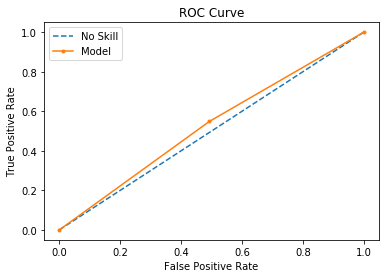

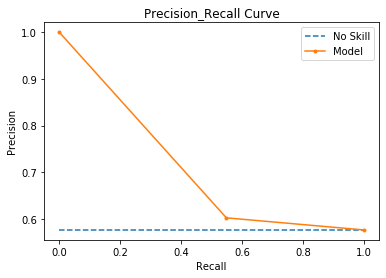

In [65]:
#plotting the roc for extra tree
Curve_plot(y_test, tree_param_pred)